<a href="https://colab.research.google.com/github/XuRui314/MathematicalModeling/blob/main/%E7%8E%A9%E8%BD%AC%E9%B8%A2%E5%B0%BE%E8%8A%B1%E6%95%B0%E6%8D%AE%E9%9B%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os
os.chdir("/content/drive/MyDrive/iris_analysis")
!ls

123.png
1240.png
img
Untitled.ipynb
微信截图_20190720135948.png
微信截图_20190720140415.png
玩转鸢尾花数据集.html
玩转鸢尾花数据集.ipynb
鸢尾花.png
鸢尾花数据集，特征为连续值数据的决策树多分类及可视化.ipynb


# 玩转鸢尾花(iris)数据集


鸢尾花(iris)数据集是每个机器学习和数据挖掘学习者入门必然会遇到的数据集，这个数据集中共有150朵鸢尾花的数据，每个数据都包含花萼长度、花萼宽度、花瓣长度、花瓣宽度四个特征，以及
setosa, versicolor, virginica三种鸢尾花种类作为标签，鸢尾花数据集是典型的高维特征、多分类的监督学习数据集，可以用来试验分类、聚类、降维、可视化等代码。

我将手把手带你进行探索性数据分析及数据可视化，使用Python数据处理库pandas、绘图库matplotlib、高级绘图库seaborn绘制热力图、箱型图、小提琴图、KDE图、直方图、安德鲁斯曲线、雷达图等高大上的图表，让枯燥的鸢尾花数据集颜值爆表。

![](https://www.baihuakong.com/zb_users/upload/2022/07/20220714144823165778130310306.jpg)

In [ ]:
# # 只需 shift+回车 运行本单元格，就可以让jupyter notebook宽屏显示
# from IPython.core.display import display, HTML
# display(HTML('<style>.container { width:100% !important; }</style>'))

<div class="alert alert-block alert-info">
Shift + Enter 运行单元格中的代码<br>
双击单元格进入编辑模式，即可修改代码。<br>
</div>

关于Jupyter notebook的基本操作、快捷键，请看这个视频：
[Jupyter notebook快速入门](https://www.bilibili.com/video/av54100790)

# 鸢尾花

鸢尾属花，单子叶植物纲，百合目，鸢尾科多年生草本植物，有块茎或匍匐状根茎；叶剑形，嵌叠状；花美丽，状花序或圆锥花序；花被花瓣状，有一长或短的管，外弯，花柱分枝扩大，花瓣状而有颜色，外展而覆盖着雄蕊；子房下位，胚珠多数，果为蒴果。<br>
鸢尾属下有三个亚属，分别是山鸢尾 (Iris-setosa)，变色鸢尾(Iris-versicolor)和维吉尼亚鸢尾(Iris-virginica)，据此可将鸢尾属花分为以上三类。本案例根据花萼的长度和宽度，花瓣的长度和宽度，采用逻辑回归建立分类模型，对鸢尾属花进行分类。 以维吉尼亚鸢尾(Iris-virginica)亚种为例，各特征参数如下图所示。<br>

>梵高-瓶中的鸢尾花

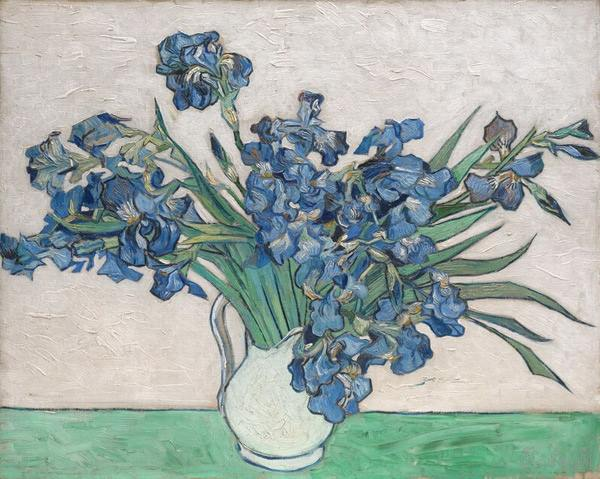![](https://upload-images.jianshu.io/upload_images/13714448-e14f276841ecf5ae.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

# 鸢尾花数据集

![](https://pic3.zhimg.com/80/v2-238d7f060d19af440fdd7094ffe022c6_720w.jpg)





![](https://i.zw3e.com/uploads/allimg/191219/4-191219103356440.jpg)

# 导入鸢尾花数据集

从数据可视化工具包seaborn中导入鸢尾花数据集，df为pandas中的DataFrame类型，也就是二维表格

In [9]:
# 导入python可视化库matplotlib
import matplotlib.pyplot as plt

# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

# 设置绘图大小
plt.style.use({'figure.figsize':(10,8)})

>Seaborn是基于matplotlib的Python可视化库。将matplotlib库进行了进一步封装，使用更加简单，而且绘制出的图表更加高大上。

In [10]:
# 导入python可视化库seaborn
import seaborn as sns

# 设置seaborn的绘图主题为whitegrid
sns.set_style("whitegrid")

# 导入鸢尾花数据集
df = sns.load_dataset("iris")

seaborn设置主题、调色板：https://www.cnblogs.com/gczr/p/6767175.html

In [11]:
# 查看df这张二维表格
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


五列数据分别是：
- sepal_length 花萼长度
- sepal_width 花萼宽度
- petal_length 花瓣长度
- petal_width 花瓣宽度
- species 鸢尾属花所属的亚种


<div class="alert alert-block alert-success">
df是pandas中的Dataframe数据类型，具有一系列封装好的属性和方法。<br>
.后面带()的是方法，不带()的是属性。
</div>

共有150行，5列数据。每一行都对应一朵鸢尾花，最后一列是鸢尾花所属的种类，种类通常作为标签。

In [12]:
df.shape

(150, 5)

查看df中各列数据的统计特征。

In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 降维

PCA主成分分析鸢尾花数据集：http://projector.tensorflow.org/

In [54]:
dic = []
mapping = {}
j = 0
for i in df.species:
  if i not in dic: # 或者用pandas的unique也可以
    dic.append(i)
    mapping[i] = j
    j += 1
df['type'] = df['species'].map(mapping)
types = df['type'].values
df['type'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [55]:
samples_df = df.drop(['species'], axis = 1)
samples = samples_df.values

In [56]:
df = df.drop(['type'], axis = 1) # 还原一下

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


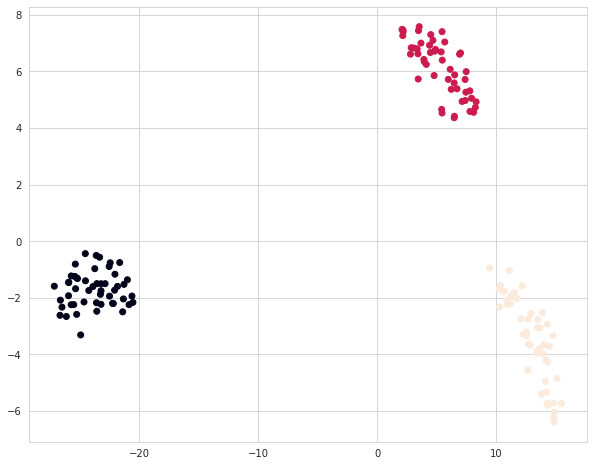

In [57]:
# Importing Modules
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Defining Model
model = TSNE(n_components=2,learning_rate=100, init='pca')

# Fitting Model
transformed = model.fit_transform(samples)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c = types)
plt.show()

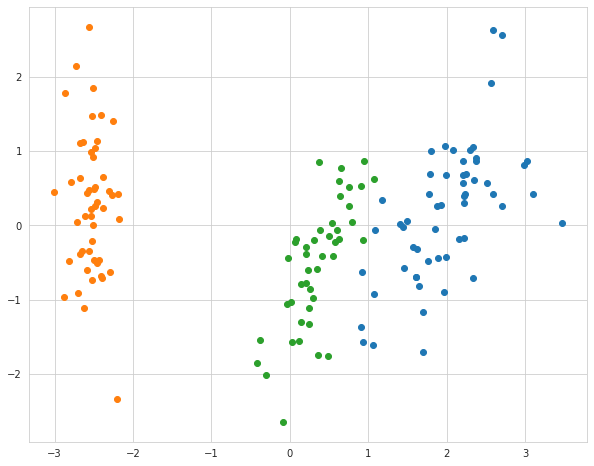

In [58]:
from sklearn.decomposition import PCA
from scipy.stats import zscore
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot

norm = zscore(samples, ddof=1) # 数据标准化
pca = PCA(n_components=2)
pca_result = pca.fit_transform(norm)

model = GaussianMixture(n_components=3)
# fit the model
model.fit(pca_result)
# assign a cluster to each example
yhat = model.predict(pca_result)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(pca_result[row_ix, 0], pca_result[row_ix, 1])
# show the plot
pyplot.show()

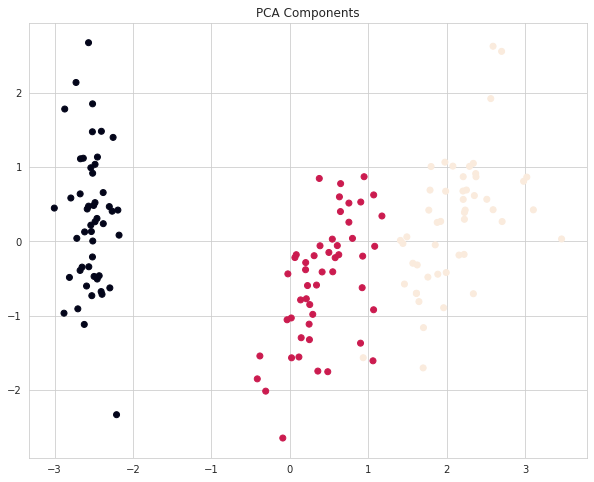

In [59]:
# the real distribution
import matplotlib.pyplot as plt
plt.title('PCA Components')
plt.scatter(pca_result[:,0], pca_result[:,1],c = types)

# 直方图

tutorial: https://www.gairuo.com/p/pandas-plot-hist

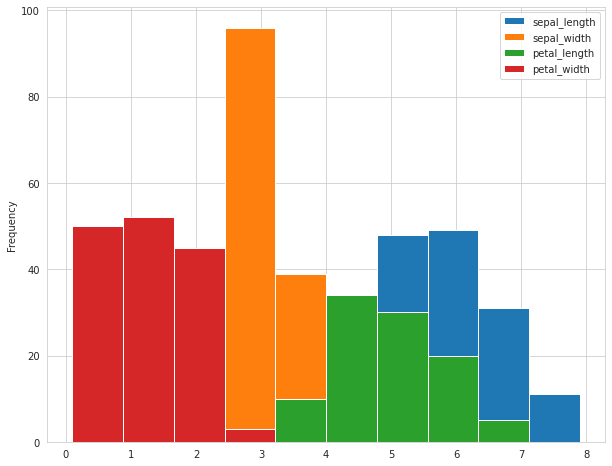

In [29]:
df.plot(kind='hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba60a395d0>,
      dtype=object)

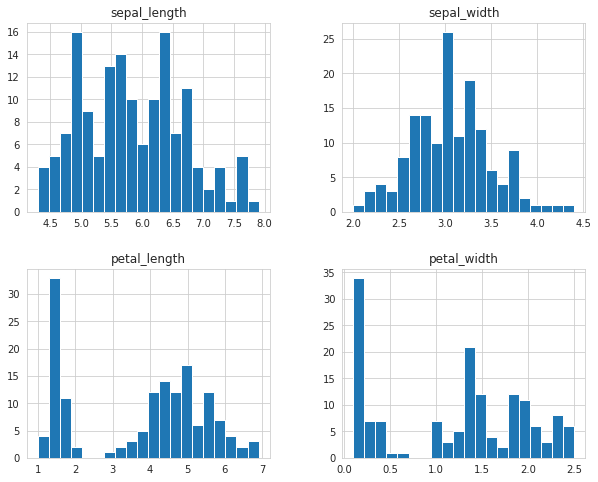

In [30]:
df.hist(bins=20)

In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


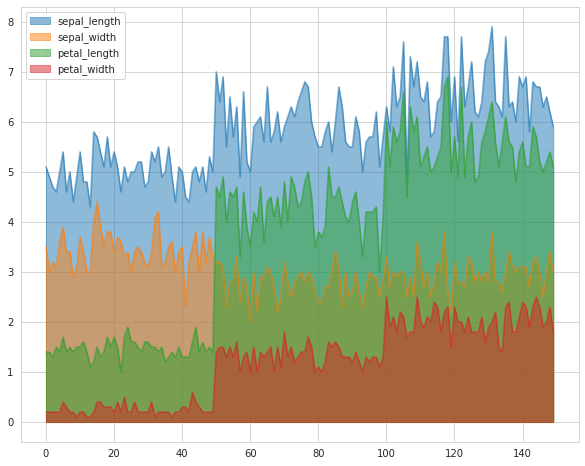

In [32]:
df.plot.area(stacked=False)

# 可视化鸢尾花数据

## 特征两两关系图

用可视化工具seaborn绘制变量之间两两关系图，三种颜色表示三种鸢尾花。

seaborn文档：http://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot

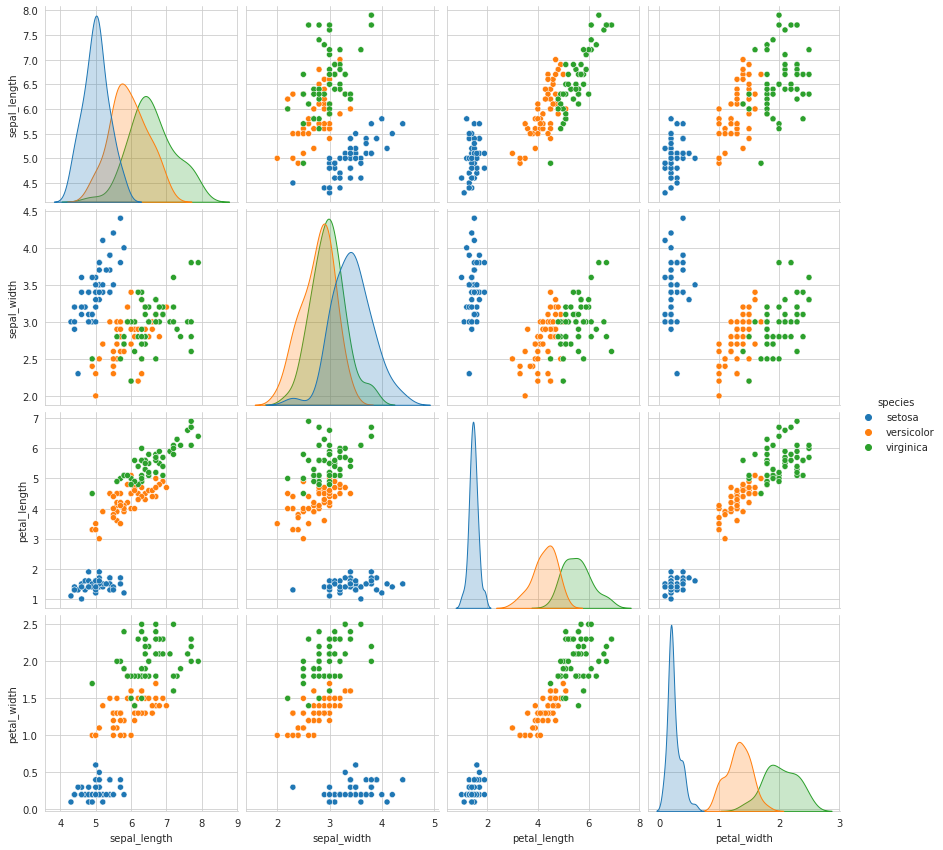

In [33]:
sns.pairplot(df, hue="species",height=3)

# KDE图

## 啥是核密度估计KDE？

![核密度估计](https://img-blog.csdnimg.cn/20201015171639894.png)

用直方图表示数据分布简单易懂，但存在以下问题：
- 密度函数不平滑，区间越大，锯齿现象越严重
- 只能显示两个变量的关系，无法显示高维数据
- 子区间宽度对最后概率密度影响很大，第二个图的子区间宽度只比第一个图增加了0.75，但密度函数结果完全不同

核函数就是给空间的每个离散点都套上一个连续分布。应用最多的是高斯核函数(Gaussian Kernel)，也就是标准正态分布。<br>
所谓核密度估计就是把所有离散点的核函数加起来，得到整体的概率密度分布。核密度估计在很多机器学习算法中都有应用，比如支持向量机、K近邻、K平均等。

核密度估计有多种内核<br>
图3（Tophat Kernl Density）为不平滑内核<br>
图4（Gaussian Kernel Density,bandwidth=0.75）为平滑内核，子区间宽0.75。<br>
在很多情况下，平滑内核（如高斯核密度估计，Gaussian Kernel Density）使用场景较多。<br>
图5 (Gaussian Kernel Density,bandwidth=0.25)为平滑内核，子区间宽0.25。<br>
图6 (Gaussian Kernel Density,bandwidth=0.55)为平滑内核，子区间宽0.55。<br>

子区间越宽，得到的密度函数越平滑。

## 绘制KDE图

seaborn官网文档：http://seaborn.pydata.org/generated/seaborn.kdeplot.html

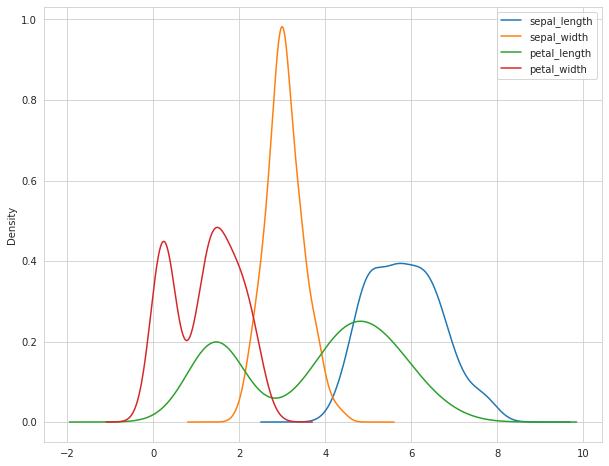

In [17]:

# KDE图，KDE图也被称作密度图(Kernel Density Estimate,核密度估计)
df.plot(kind='kde')

对比一下直方图

<AxesSubplot:ylabel='Frequency'>

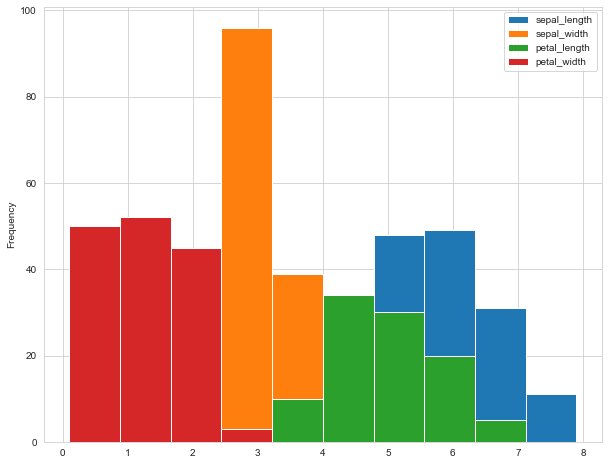

In [ ]:
df.plot(kind='hist')

c:\users\19772\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\19772\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
c:\users\19772\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\19772\appdata\local\programs\p

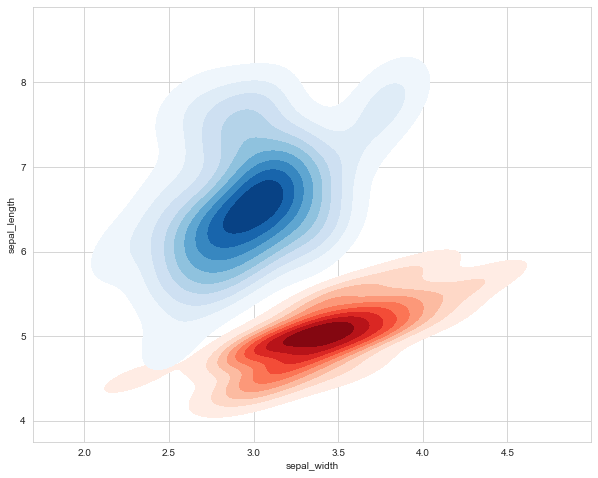

In [ ]:
# 取出所有为setosa的鸢尾花数据
setosa = df.loc[df.species == "setosa"]

# 取出所有为versicolor的鸢尾花数据
versicolor = df.loc[df.species == "versicolor"]

# 取出所有为virginica的鸢尾花数据
virginica = df.loc[df.species == "virginica"]



# 分别绘制setosa和virginica两种鸢尾花在花萼宽度、花萼长度两个维度的KDE可视化
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,cmap="Blues", shade=True, shade_lowest=False)
# ax = sns.kdeplot(versicolor.sepal_width, versicolor.sepal_length,cmap="Greens", shade=True, shade_lowest=False)

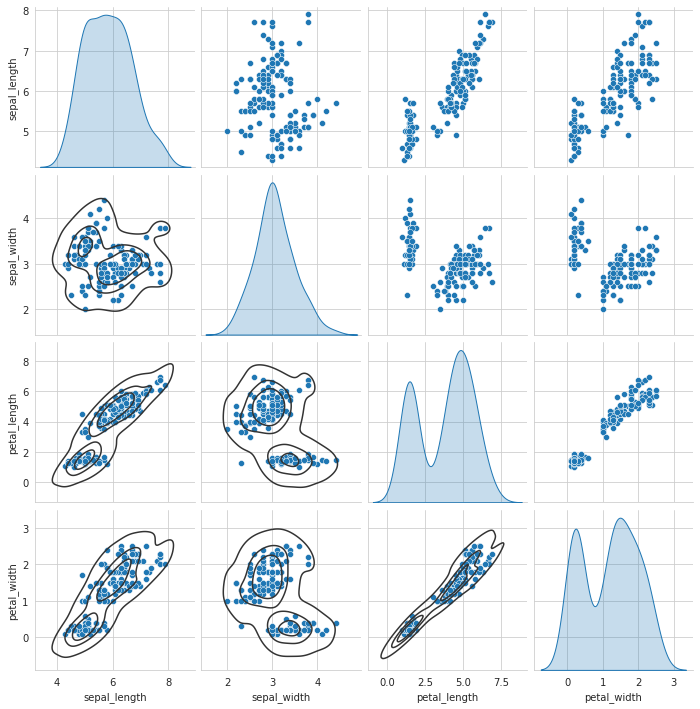

In [34]:
g = sns.pairplot(df, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

## 热力图

In [ ]:
setosa.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


绘制特征两两之间的pearson相关系数矩阵。


In [ ]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


将pearson相关系数矩阵绘制热力图，可以清楚看到变量之间的相关关系。<br>
花萼长度和花萼宽度没有相关关系，而花瓣长度和花瓣宽度之间的相关关系却很明显。


seaborn热力图文档：http://seaborn.pydata.org/generated/seaborn.heatmap.html

<AxesSubplot:>

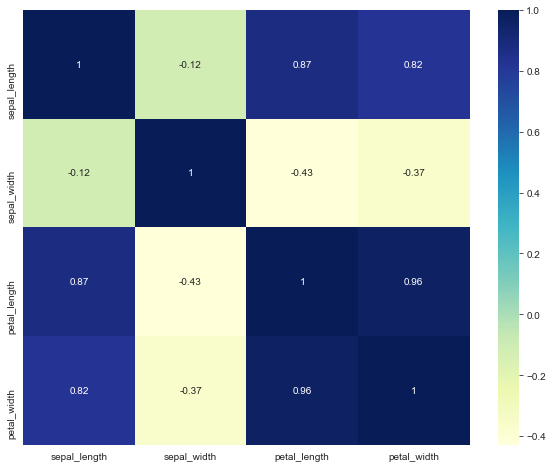

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

鸢尾花数据集中只有4个特征，不能充分显示热力图的优势，下面导入另一个flight数据集，显示了1949到1960年每个月的航班数量，绘制出热力图。

In [62]:
flights = sns.load_dataset("flights")

In [63]:
flights = flights.pivot("month", "year", "passengers")

In [64]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


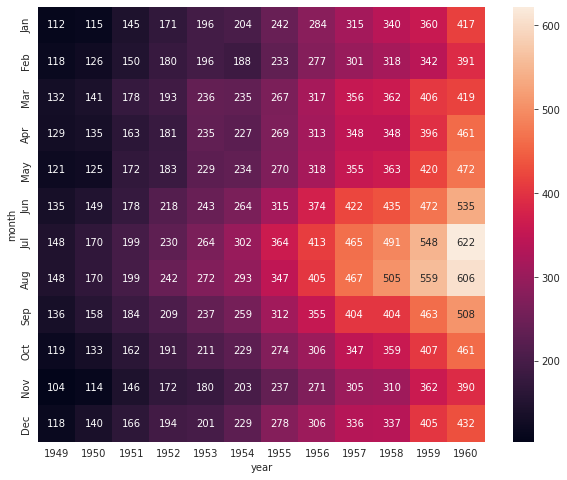

In [65]:
# annot=True表示绘制数字
# fmt='d'表示数字按整数显示
sns.heatmap(flights,annot=True, fmt='d')

## 箱型图

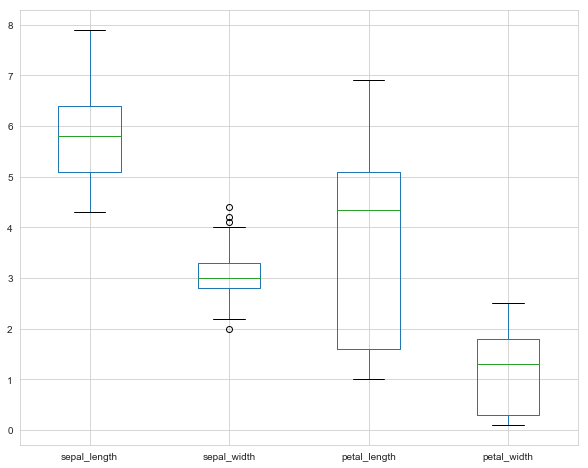

In [ ]:
df.plot(kind='box')

seaborn官方文档：http://seaborn.pydata.org/generated/seaborn.boxplot.html

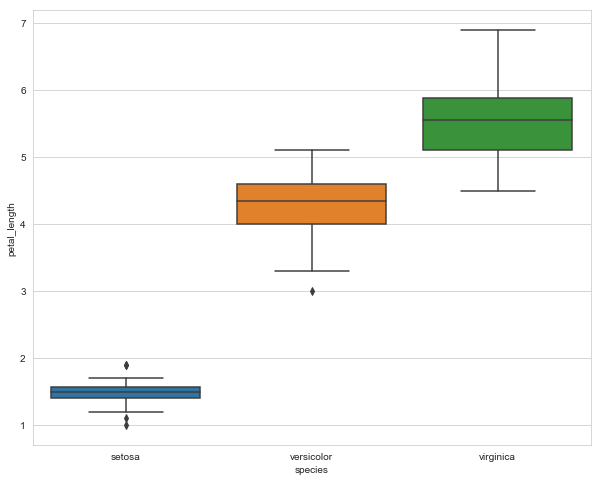

In [ ]:
sns.boxplot(y=df['petal_length'],x=df['species'])

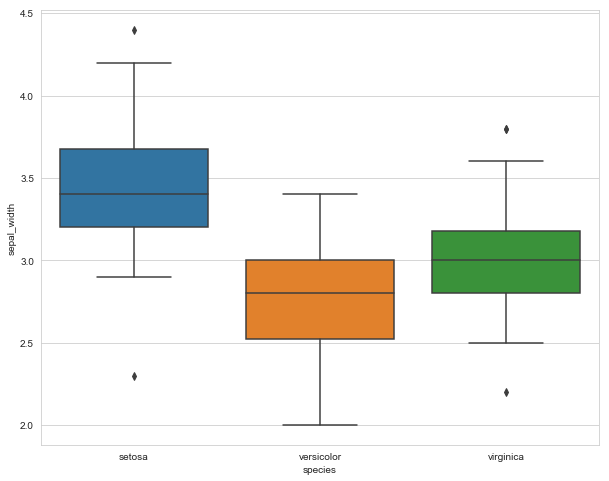

In [ ]:
sns.boxplot(data=df,x='species',y='sepal_width')

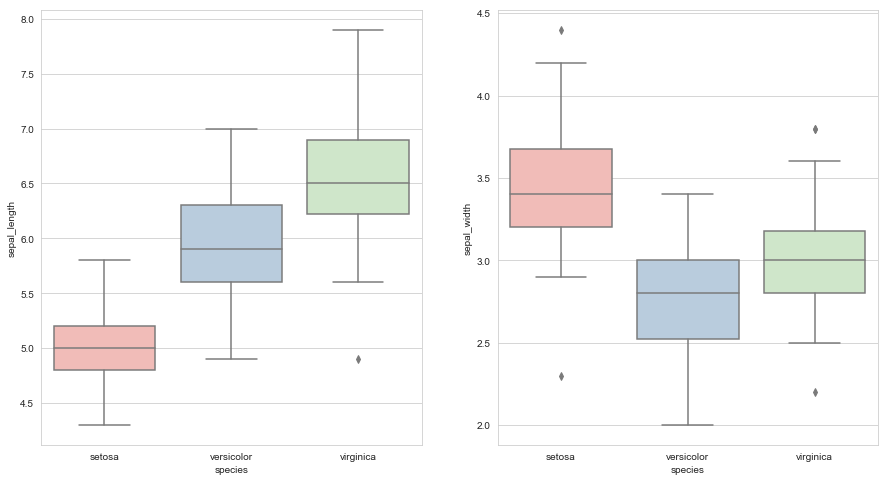

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15, 8))
sns.boxplot(x="species",y="sepal_length",data=df, palette="Pastel1", ax=axes[0])
sns.boxplot(x="species",y="sepal_width",data=df, palette="Pastel1",ax=axes[1])

[博客：箱型图异常值检测](https://blog.csdn.net/shuaishuai3409/article/details/51428106)

sepal_length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal_width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal_length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal_width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

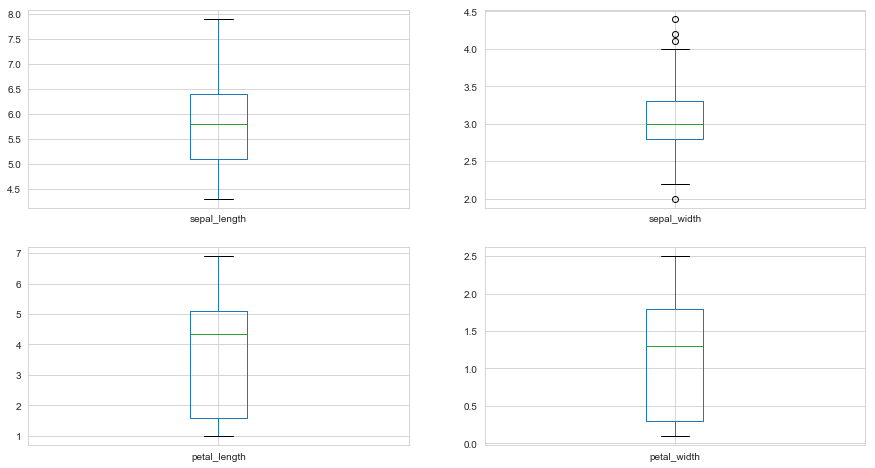

In [ ]:
#kind='box'绘制箱图,包含子图且子图的行列布局layout为2*2，子图共用x轴、y轴刻度，标签为False
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, figsize=(15,8))

## 小提琴图

In [ ]:
plt.style.use({'figure.figsize':(8,8)})

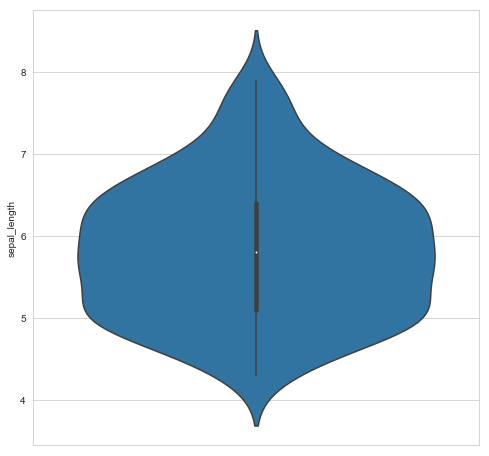

In [ ]:
# 小提琴图-鸢尾花数据集中“花萼长度”的数据分布
sns.violinplot( y=df["sepal_length"] )

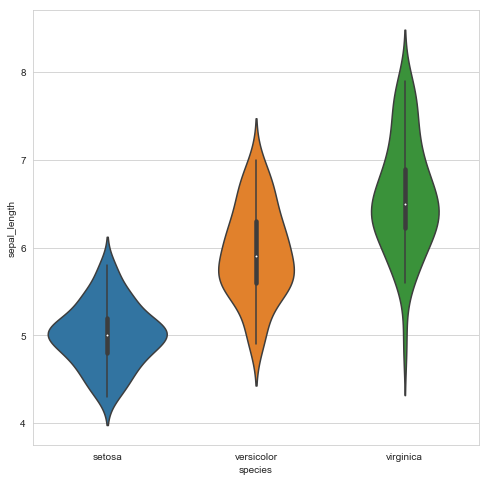

In [ ]:
# 小提琴图-不同种类鸢尾花的花萼长度分布
sns.violinplot( x=df["species"], y=df["sepal_length"] )

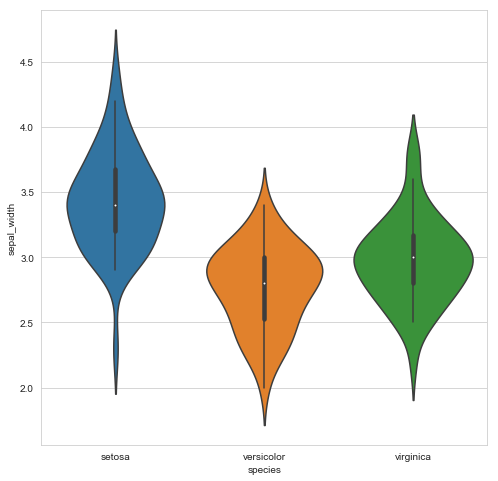

In [ ]:
# 小提琴图-不同种类鸢尾花的花萼宽度分布
sns.violinplot( x=df["species"], y=df["sepal_width"] )

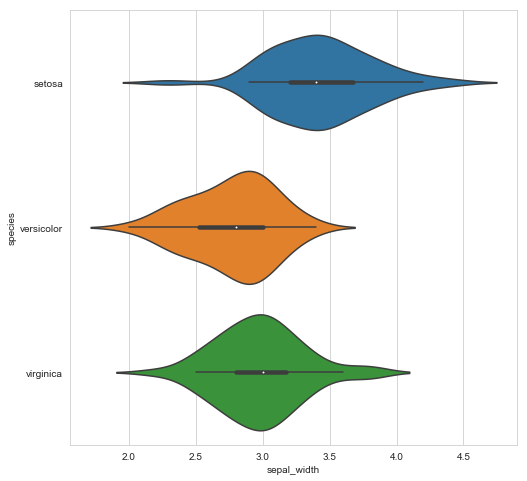

In [ ]:
# 小提琴图-不同种类鸢尾花的花萼宽度分布（水平小提琴图）
sns.violinplot( y=df["species"], x=df["sepal_width"] )

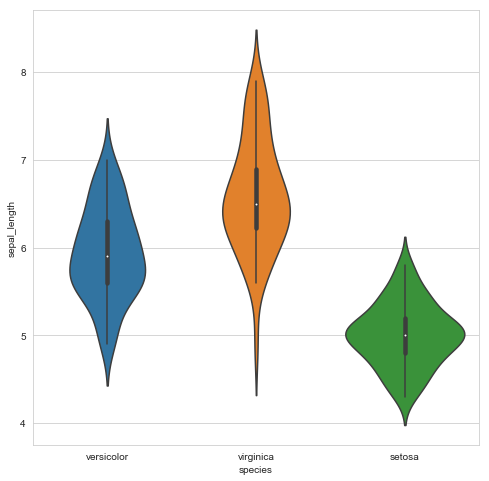

In [ ]:
# 按顺序依次显示不同鸢尾花种类对应的花萼长度数据分布
sns.violinplot(x='species', y='sepal_length', data=df, order=[ "versicolor", "virginica", "setosa"])

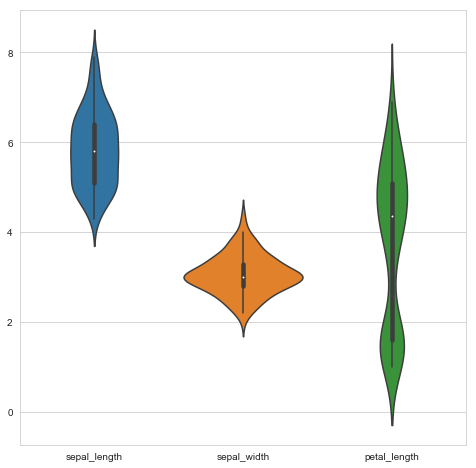

In [ ]:
# 单独拿出某些特征的数据绘制分布
# 小提琴图-花萼长度、花萼宽度、花瓣长度、花瓣宽度的数据分布
# 使用pandas数据分析库中Dataframe对象的.iloc()方法对数据切片，:表示选择所有行，0:3表示选取前三列
sns.violinplot(data=df.iloc[:,0:3])

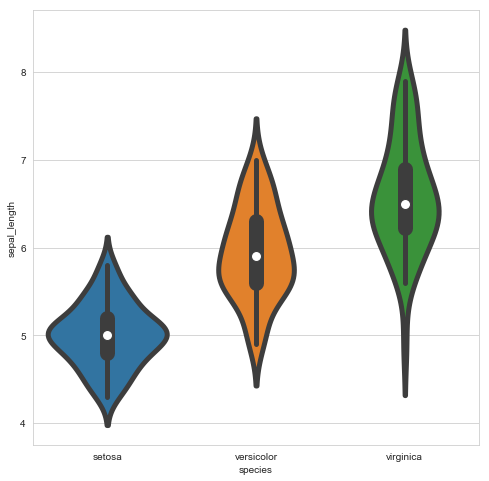

In [ ]:
# 小提琴图自定义线宽
sns.violinplot( x=df["species"], y=df["sepal_length"], linewidth=5)

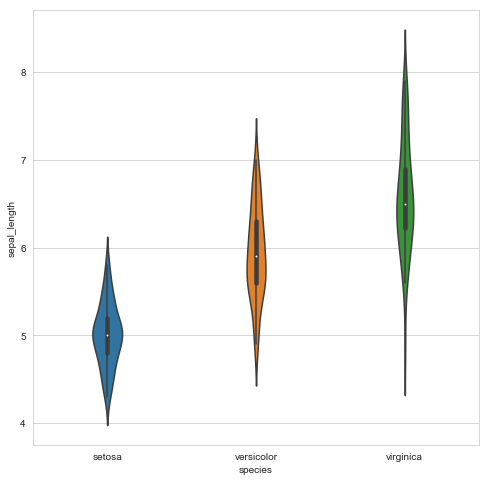

In [ ]:
# 小提琴图自定义图宽
sns.violinplot( x=df["species"], y=df["sepal_length"], width=0.2)

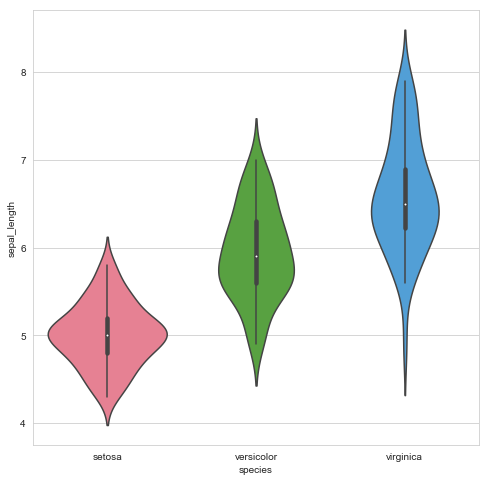

In [ ]:
# 使用调色板 Use a color palette
sns.violinplot( x=df["species"], y=df["sepal_length"], palette="husl")

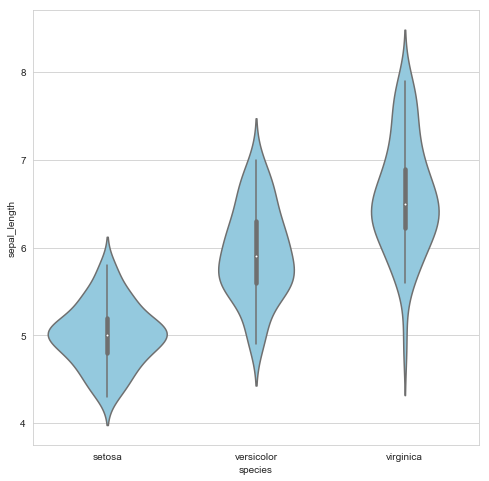

In [ ]:
# 单种颜色
sns.violinplot( x=df["species"], y=df["sepal_length"], color="skyblue");

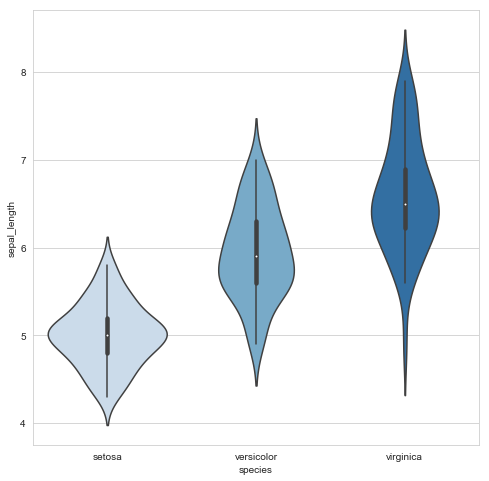

In [ ]:
# 使用调色板 Use a color palette
sns.violinplot( x=df["species"], y=df["sepal_length"], palette="Blues")

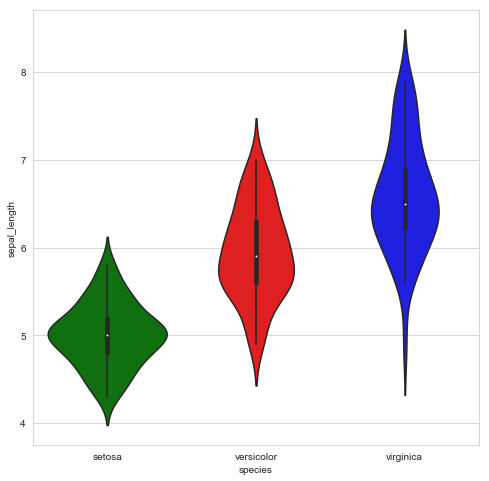

In [ ]:
# 为每个类型指定一种颜色
# 先构建一个字典，将类别与颜色映射
my_pal = {"versicolor": "r", "setosa": "g", "virginica":"b"}
#plot it
sns.violinplot( x=df["species"], y=df["sepal_length"], palette=my_pal)

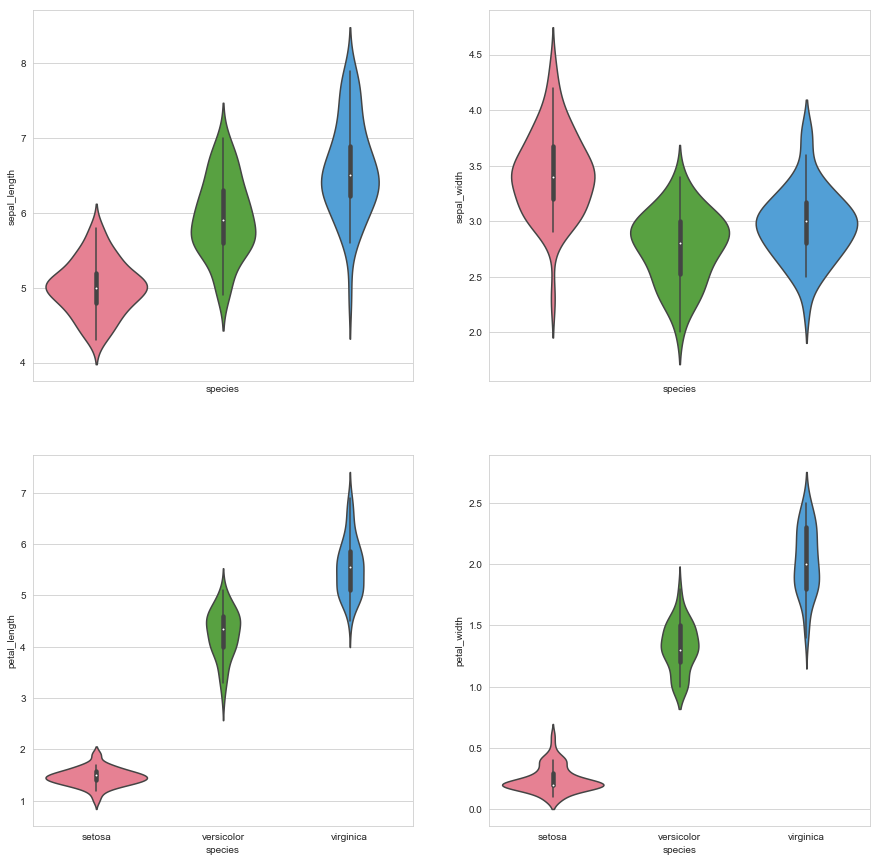

In [ ]:
# 小提琴图-通过subplot绘制子图

import matplotlib.pyplot as plt 
%matplotlib inline

f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=True)

sns.violinplot(x='species', y='sepal_length', data=df, palette="husl", ax=axes[0, 0])
sns.violinplot(x='species', y='sepal_width', data=df, palette="husl", ax=axes[0, 1])
sns.violinplot(x='species', y='petal_length', data=df, palette="husl", ax=axes[1, 0])
sns.violinplot(x='species', y='petal_width', data=df, palette="husl", ax=axes[1, 1])
plt.show()

如果特征中有仅包含两个值的定类数据（比如性别、是否吸烟），那可以让小提琴图各显示一半。
这里导入另一个数据集：小费tips数据集，这个数据集显示了不同客人在不同时间给小费的情况。

In [ ]:
df_test = sns.load_dataset('tips')

In [ ]:
df_test.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


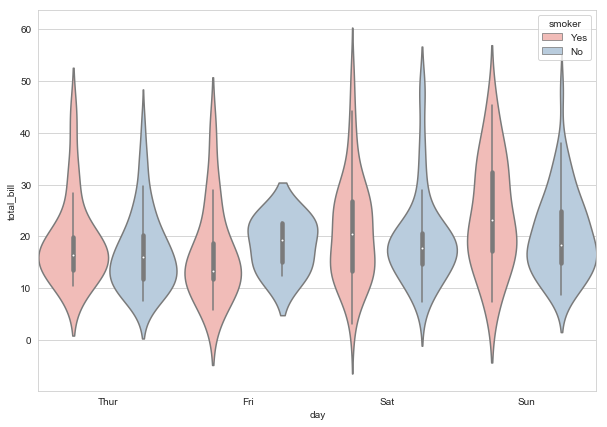

In [ ]:
# 小提琴图-按是否抽烟分组
f, ax = plt.subplots(figsize=(10, 7))
sns.violinplot(x="day", y="total_bill", hue="smoker", data=df_test, palette="Pastel1",width=1)

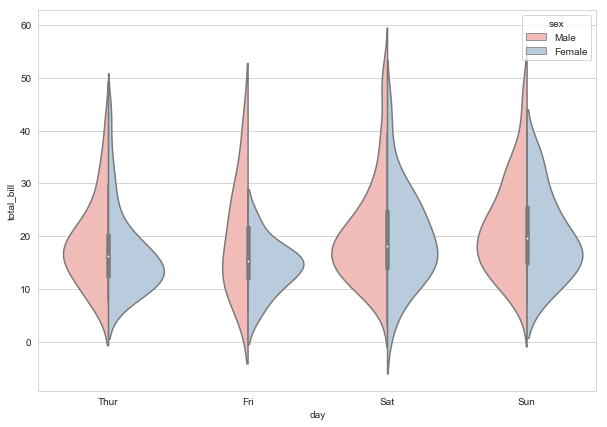

In [ ]:
# 小提琴图-按性别分组，split=True表示各显示一半。
f, ax = plt.subplots(figsize=(10, 7))
sns.violinplot(x="day", y="total_bill", hue="sex", data=df_test,split=True, palette="Pastel1")

inner参数用于指定数据点的显示方式，包括箱型图、四分位虚线、散点、细线显示。

![figure和axis](https://upload-images.jianshu.io/upload_images/13714448-272f864047aaf106.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

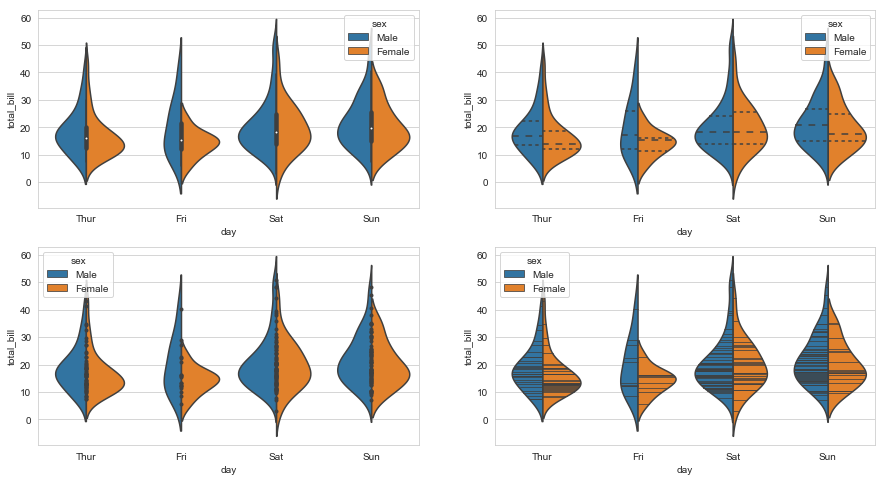

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(15, 8))
sns.violinplot(x="day", y="total_bill", hue="sex", data=df_test,split=True, inner="box",ax=axes[0,0])
sns.violinplot(x="day", y="total_bill", hue="sex", data=df_test,split=True, inner="quartil",ax=axes[0,1])
sns.violinplot(x="day", y="total_bill", hue="sex", data=df_test,split=True, inner="point",ax=axes[1,0])
sns.violinplot(x="day", y="total_bill", hue="sex", data=df_test,split=True, inner="stick",ax=axes[1,1])

pandas.plotting文档：https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

# 平行坐标图

平行坐标是可视化高维几何和分析多元数据的常用方法。看似高大上，但实际上很简单，就是简单粗暴地把不同特征的数据绘制成折线图。

In [ ]:
plt.style.use({'figure.figsize':(15,10)})

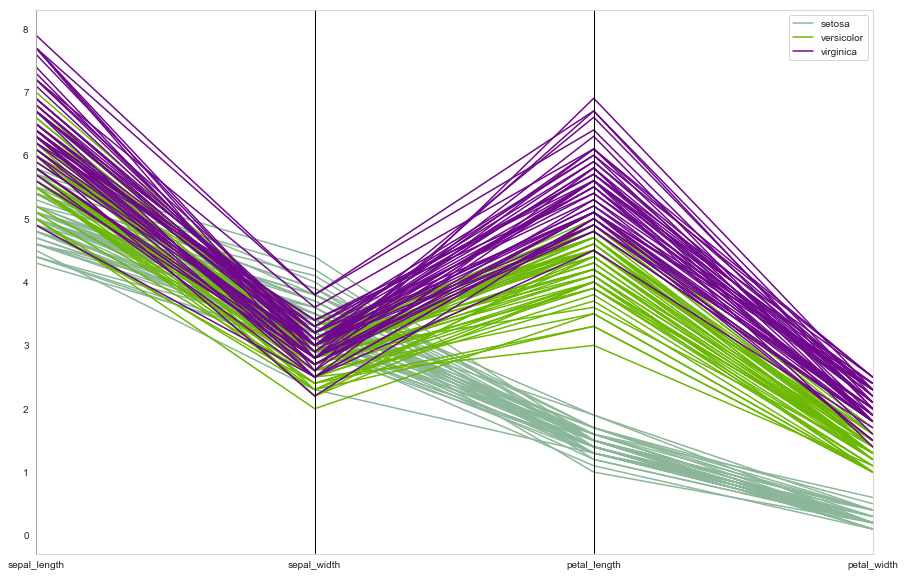

In [ ]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(df,'species')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 六边形蜂窝图

pandas官方文档：https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hexbin.html

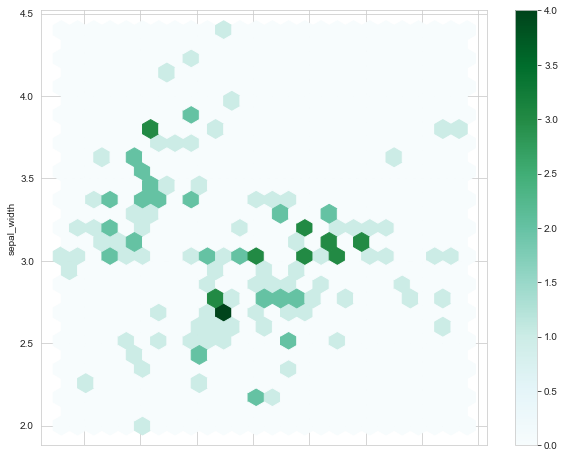

In [ ]:
df.plot.hexbin(x='sepal_length', y='sepal_width', gridsize=25)

# 雷达图（径向坐标可视化）

RadViz雷达图（径向坐标可视化）是一种可视化多维数据的方式。<br>
本质是将多维特征降维压缩到二维，每个数据压缩为一个点。
它基于基本的弹簧压力最小化算法。<br>



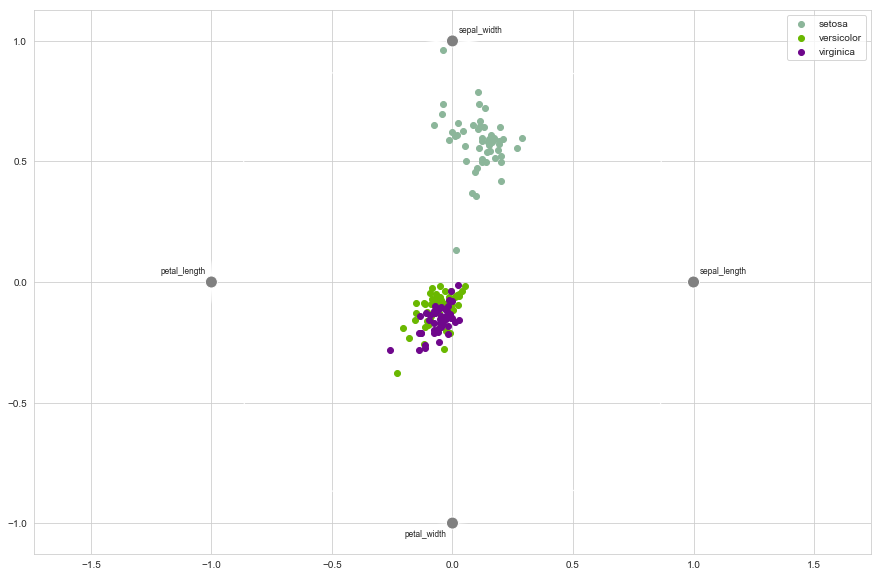

In [ ]:
from pandas.plotting import radviz
radviz(df,'species')

# 安德鲁斯曲线
安德鲁斯曲线将每个样本的属性值转化为傅里叶序列的系数来绘制曲线。

[傅里叶序列动画演示](https://wow.techbrood.com/fiddle/16534)

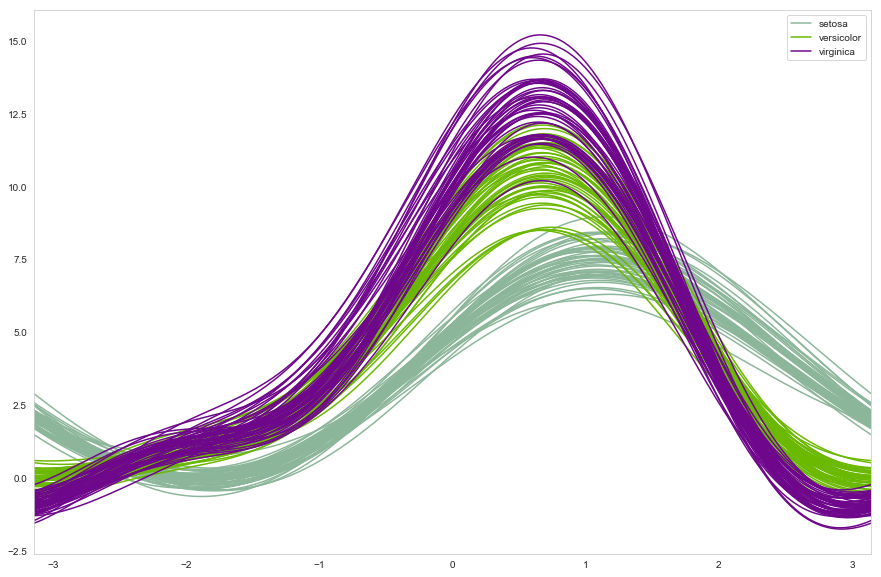

In [ ]:
from pandas.plotting import andrews_curves
andrews_curves(df, 'species')

# 试验区

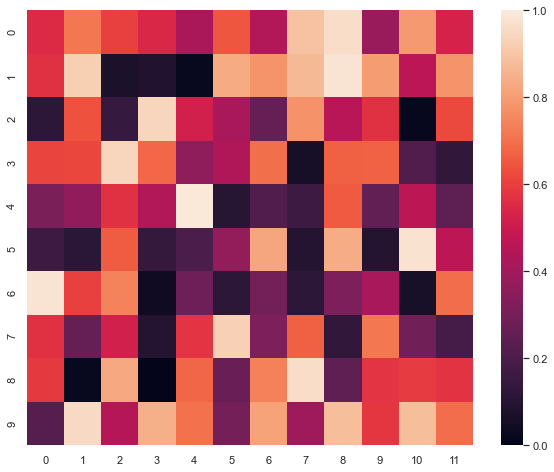

In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data, vmin=0, vmax=1)


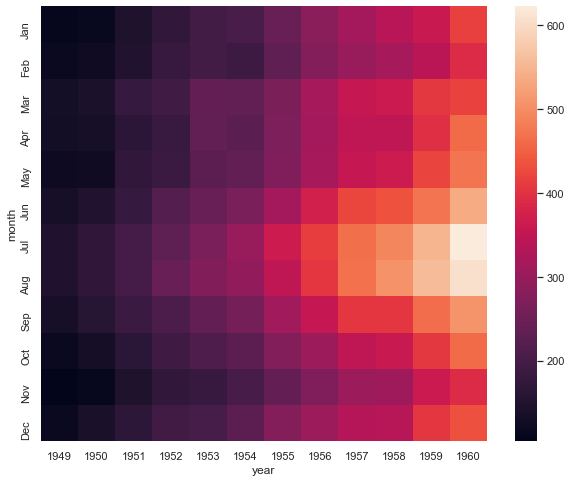

In [ ]:
ax = sns.heatmap(flights)

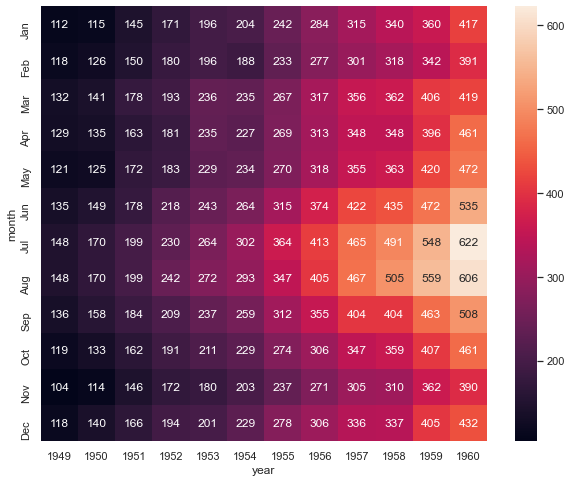

In [ ]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights, annot=True, fmt="d")